In [5]:
categories.items()

dict_items([('Traditional', {'benin': 'Benin Head', 'gelede': 'Gelede Headdress', 'nok': 'Male NOK Head'}), ('Contemporary', {'home': 'The Way Home', 'orange': 'The Orange Market', 'palm': 'The palm wine tappers'}), ('Modern', {'dancer': 'The Dancer', 'iwin': 'Iwin', 'masks': 'Masks'})])

In [1]:
# Function to load and display images
def display_image(path, title):
    image = cv2.imread(path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        plt.show()
        return True
    return False

# Image transformation function
def transformation_techniques(technique, category, key):
    for ext in extensions:
        path = f'img/{category}/{key}.{ext}'
        img = cv2.imread(path, 0)
        if img is None:
            continue

        rows, cols = img.shape
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(img)

        if technique == 'translation':
            x = int(input("Enter X value: ")) 
            y = int(input("Enter Y value: "))
            M = np.float32([[1, 0, x], [0, 1, y]])
            transformed_img = cv2.warpAffine(img, M, (cols, rows))

        elif technique == 'reflection':
            M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
            transformed_img = cv2.warpPerspective(img, M, (cols, rows))

        elif technique == 'rotation':
            angle = int(input("Enter rotation angle: "))
            M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
            transformed_img = cv2.warpAffine(img, M, (cols, rows))

        elif technique == 'cropping':
            x1 = int(input(f"Enter x1 value: "))
            x2 = int(input(f"Enter x2 value: "))
            y1 = int(input(f"Enter y1 value: "))
            y2 = int(input(f"Enter y2 value: "))
            transformed_img = img[y1:y2, x1:x2]

        elif technique in ['sheared-x', 'sheared-y']:
            shear_factor = float(input("Enter shear factor: "))
            M = np.float32([[1, shear_factor if technique == 'sheared-x' else 0, 0],
                            [shear_factor if technique == 'sheared-y' else 0, 1, 0],
                            [0, 0, 1]])
            transformed_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

        elif technique == 'blurring':
            ksize = int(input("Enter kernel size (odd number): "))
            transformed_img = cv2.GaussianBlur(img, (ksize, ksize), 0)
        
        else:
            print("Invalid transformation technique.")
            return
        
        plt.subplot(1, 2, 2)
        plt.title("Transformed Image")
        plt.imshow(transformed_img)
        plt.show()
        return
    print("Image not found.")

Enter your valid email address:  c@gmail.com
Enter your age (must be above 18):  23
Enter your category (Traditional, Contemporary, Modern):  contemporary


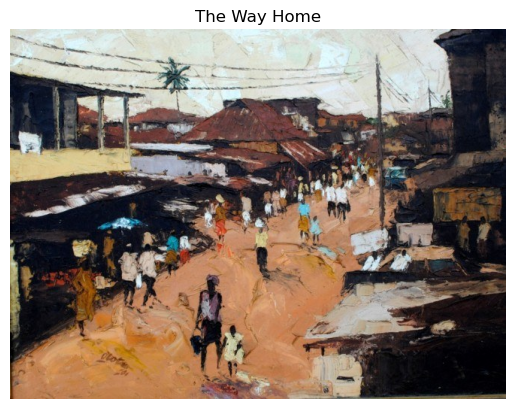

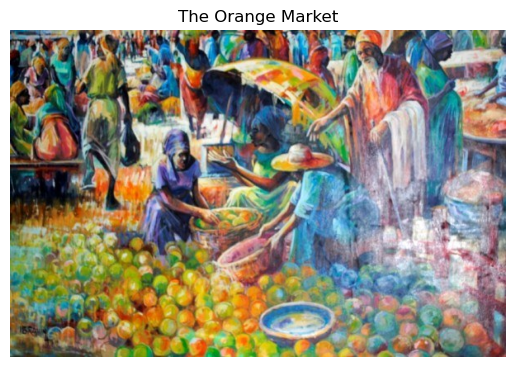

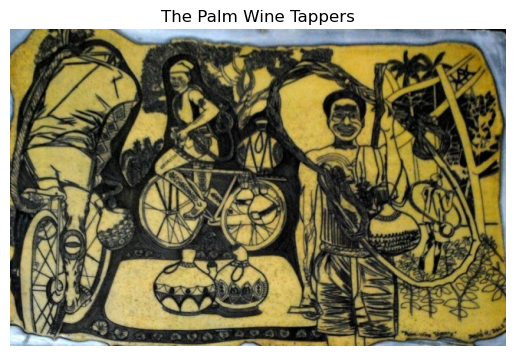

Enter image transformation technique:  tHe PalM winE tappers


Invalid technique. Choose from: ['translation', 'reflection', 'rotation', 'cropping', 'sheared-x', 'sheared-y', 'blurring']


Enter image transformation technique:  translation
Enter the name of the selected image:  tHe PalM Wine TapPers


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

# Categories dictionary
categories = {
    "Traditional": {"benin": "Benin Head", "gelede": "Gelede Headdress", "nok": "Male NOK Head", "yoruba": "Yoruba Head"},
    "Contemporary": {"home": "The Way Home", "orange": "The Orange Market", "palm": "The Palm Wine Tappers"},
    "Modern": {"dancer": "The Dancer", "iwin": "Iwin", "masks": "Masks"}
}

# Case-insensitive category lookup
type_lookup = {key.lower(): key for key in categories.keys()}

# Email validation regex pattern
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

# Supported image extensions
extensions = ["jpg", "png", "jpeg"]

# Main program loop
while True:

    #this validates the email
    email = input("Enter your valid email address: ").strip().lower()
    if not re.match(email_pattern, email):
        print("Invalid email. Try again.")
        continue
    
    age = input("Enter your age (must be above 18): ")
    if not age.isdigit() or int(age) <= 18:
        print("Invalid age. You must be above 18.")
        continue
    
    category = input("Enter your category (Traditional, Contemporary, Modern): ").strip().lower()
    if category not in type_lookup:
        print("Invalid category. Choose from:", list(type_lookup.keys()))
        continue
    category_key = type_lookup[category]
    subcategories = categories[category_key]

    for key, value in subcategories.items():
        for ext in extensions:
            path = f'img/{category_key}/{key}.{ext}'
            if display_image(path, value):
                break
    
    valid_inputs = ['translation', 'reflection', 'rotation', 'cropping', 'sheared-x', 'sheared-y', 'blurring']
    while True:
        technique = input("Enter image transformation technique: ").strip().lower()
        if technique not in valid_inputs:
            print("Invalid technique. Choose from:", valid_inputs)
            continue

        selected_image = input("Enter the name of the selected image: ").strip().lower()
        selected_key = next((k for k, v in subcategories.items() if v.lower() == selected_image), None)
        
        if not selected_key:
            print("Image not found in the selected category.")
            continue
        
        transformation_techniques(technique, category_key, selected_key)
        
        if input("Do you want to continue? (Y/N): ").strip().lower() != 'y':
            break
